In [93]:
import sys
sys.path.append('../')

In [94]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, cat2hpx, make_healpix_map
import pandas as pd
import numpy as np
import seaborn as sns
import healpy as hp
%matplotlib inline

Resolution of the HEALPix map:
0.22903242745449373 deg per pixel, or
13.741945647269624 arcmin per pixel, or
824.5167388361774 arcsec per pixel
Resolution of the HEALPix map:
0.22903242745449373 deg per pixel, or
13.741945647269624 arcmin per pixel, or
824.5167388361774 arcsec per pixel


/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_61517/999726465.py:16: RuntimeWarning: invalid value encountered in true_divide
  ratio_map = desi_cat_hpx_cutoff/desi_cat_hpx


Resolution of the HEALPix map:
0.22903242745449373 deg per pixel, or
13.741945647269624 arcmin per pixel, or
824.5167388361774 arcsec per pixel


Text(0.5, 0, 'mean p_any')

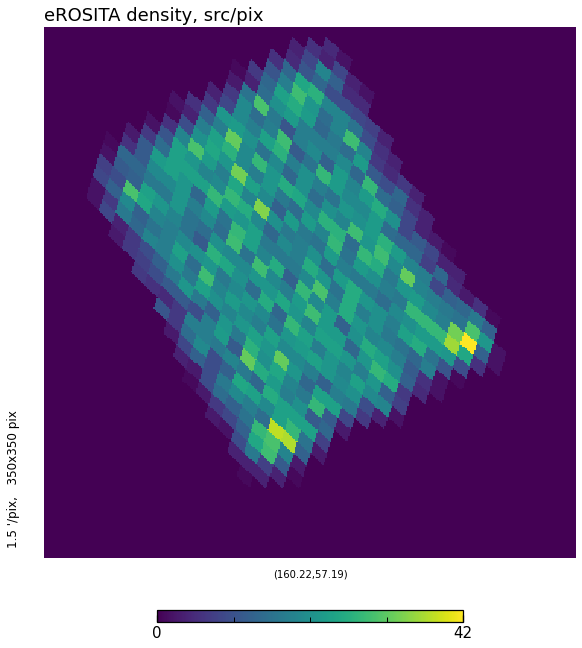

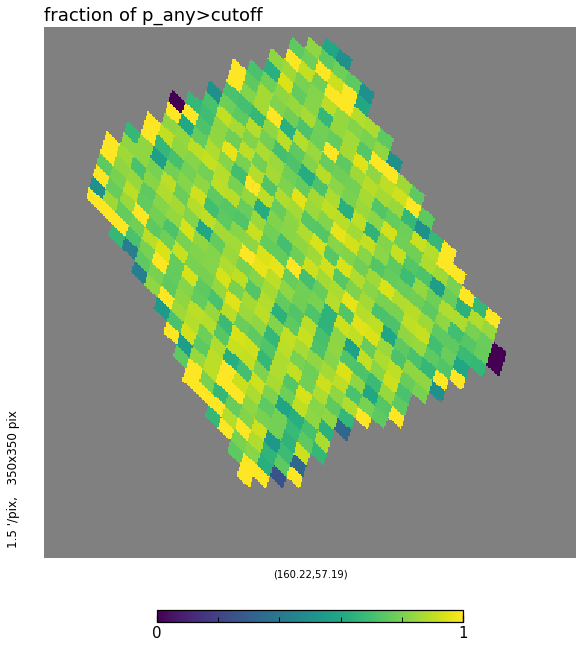

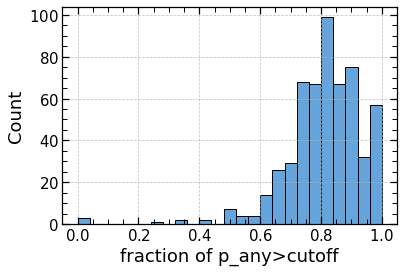

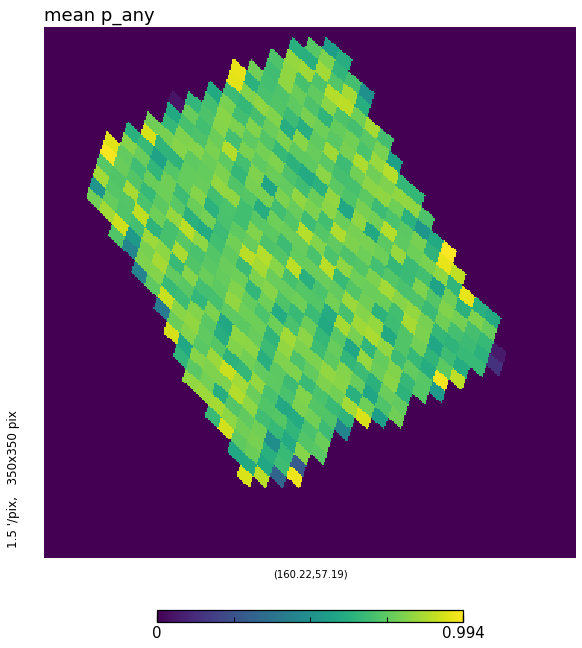

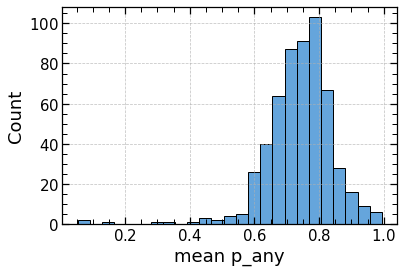

In [95]:
#desi_cat = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_all_candidates.gz_pkl', compression='gzip')
desi_cat = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match.gz_pkl', compression='gzip')
desi_cat_all = desi_cat[['RA_fin', 'DEC_fin', 'nway_prob_has_match']]
desi_cat_cutoff = desi_cat.query('nway_prob_has_match > 0.42')

def cat2hpx(x,y, nside):
    return make_healpix_map(x, y, np.ones_like(x), nside=nside, mode = 'sum')[0][0]

plot_args = {'rot':[160.22,57.19], 'xsize': 350,}


nside = 256
desi_cat_hpx = cat2hpx(desi_cat_all['RA_fin'].values, desi_cat_all['DEC_fin'].values, nside=nside)
desi_cat_hpx_cutoff = cat2hpx(desi_cat_cutoff['RA_fin'].values, desi_cat_cutoff['DEC_fin'].values, nside=nside)

ratio_map = desi_cat_hpx_cutoff/desi_cat_hpx
ratio_map = hp.ma(ratio_map, badval=np.nan)

fig = plt.figure(figsize=(10,10))
hp.gnomview(desi_cat_hpx,  fig = fig, title = 'eROSITA density, src/pix',  **plot_args)


fig = plt.figure(figsize=(10,10))
hp.gnomview(ratio_map,  fig = fig, title = 'fraction of p_any>cutoff', **plot_args)
plt.figure()
sns.histplot(ratio_map, bins=25)
plt.xlabel('fraction of p_any>cutoff')







mean_p_any_map = make_healpix_map(desi_cat_all['RA_fin'].values, desi_cat_all['DEC_fin'].values, desi_cat_all['nway_prob_has_match'].values, nside=nside)
mean_p_any_map = mean_p_any_map[0][0]
fig = plt.figure(figsize=(10,10))
hp.gnomview(mean_p_any_map, title = 'mean p_any', fig = fig, **plot_args)
plt.figure()
sns.histplot(mean_p_any_map[mean_p_any_map!=0], bins=25)
plt.xlabel('mean p_any')


